In [1]:
import pandas as pd
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


df = pd.read_csv('final.csv')
df

,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,vessel.name,...,encounter.encountered_vessel.destination_port.name,encounter.encountered_vessel.authorizations.authorized,encounter.encountered_vessel.authorizations.unknown,loitering.total_distance_km,loitering.loitering_hours,port.lat,port.lon,port.country,port.name,date
0,f6f02128e9fb54c8ea1bc7987f8d46d7.1,encounter,2015-02-02 23:40:00 UTC,2015-02-03 05:30:00 UTC,-45.583971,-60.494544,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,PRINCE OF STREAM,...,RECALADA,NaN,ICCAT|CCSBT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
1,1193f92e4aa29480fbfa2ace644fa143.1,encounter,2015-05-29 15:30:00 UTC,2015-05-30 08:30:00 UTC,-45.505687,-60.486374,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,PRINCE OF STREAM,...,PUNTA ARENAS,NaN,ICCAT|CCSBT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
2,ea7ca74af5300c273a0ce288f129763e.1,encounter,2015-02-19 15:50:00 UTC,2015-02-19 21:40:00 UTC,-45.534999,-60.493174,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,PRINCE OF STREAM,...,NaN,NaN,ICCAT|CCSBT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
3,7a6a1688b85b7e12770ed2385dd38656.1,encounter,2015-02-17 15:30:00 UTC,2015-02-17 21:10:00 UTC,-45.554563,-60.497218,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,PRINCE OF STREAM,...,MONTEVIDEO,NaN,CCSBT|ICCAT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
4,5489a5c393dafcb70b4f29d0b52786c7.1,encounter,2015-02-15 17:40:00 UTC,2015-02-16 00:20:00 UTC,-45.554497,-60.495039,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,PRINCE OF STREAM,...,ZHOUSHAN,NaN,CCSBT|ICCAT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357749,457489673d1f2183affc2b5e48275c61.1,encounter,2019-05-27 05:20:00 UTC,2019-05-27 20:40:00 UTC,60.394376,-145.729141,ffda1315f-f671-8416-639d-ecab7d962b61,carrier,368175000,NAKNEK SPIRIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01
357750,c73da37efe331a533223af02e2812534.1,encounter,2019-05-16 00:30:00 UTC,2019-05-16 10:40:00 UTC,60.390655,-145.730794,ffda1315f-f671-8416-639d-ecab7d962b61,carrier,368175000,NAKNEK SPIRIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01
357751,85a3ce0052fd9a7f1963020739d8b1e1.1,encounter,2019-08-23 04:20:00 UTC,2019-08-24 15:40:00 UTC,60.703001,-146.712093,ffda1315f-f671-8416-639d-ecab7d962b61,carrier,368175000,NAKNEK SPIRIT,...,WHITTIER AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01
357752,d15ada0c30f2a3cd765ce318f541d181.1,encounter,2019-06-06 05:00:00 UTC,2019-06-06 20:50:00 UTC,60.235516,-144.919231,ffda1315f-f671-8416-639d-ecab7d962b61,carrier,368175000,NAKNEK SPIRIT,...,CORDOVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01


In [2]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

In [3]:
def count_unknown(s):
    if s == 'NA':
        return 0
    else:
        return len(str(s).split('|'))

<AxesSubplot:>

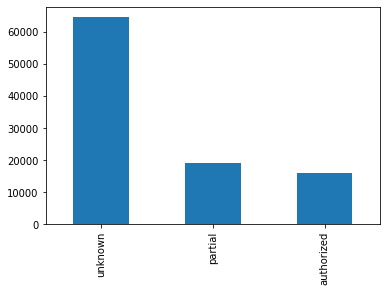

In [4]:
df['encounter.authorization_status'].value_counts().plot(kind='bar')

In [5]:
df['unauthorized_count'] = df['encounter.encountered_vessel.authorizations.unknown'].fillna('NA').apply(count_unknown)


<AxesSubplot:>

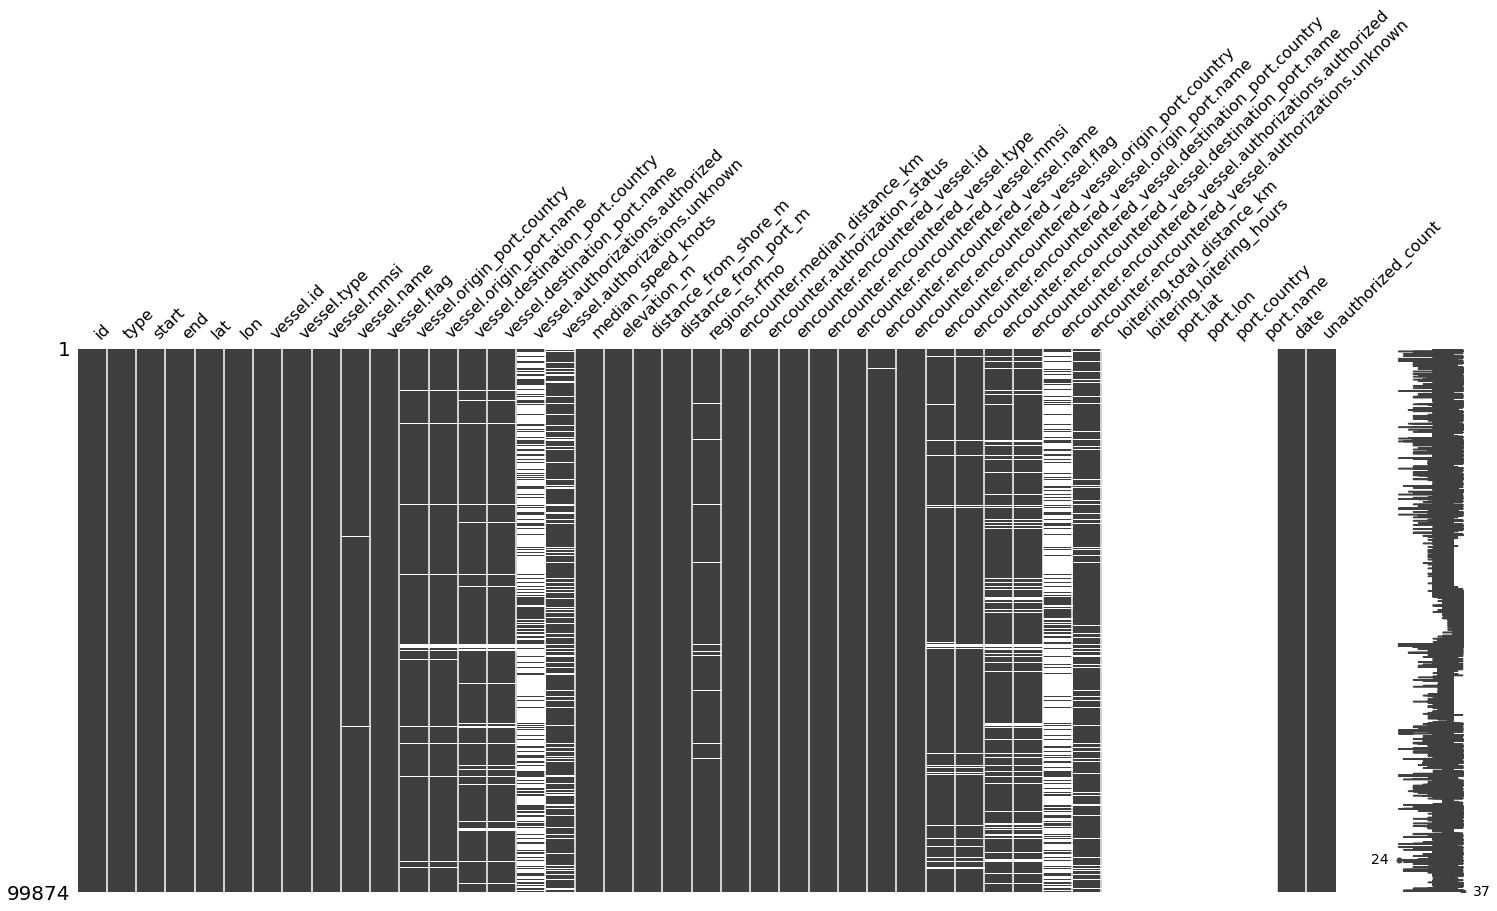

In [6]:
msno.matrix(df)

In [7]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['duration'] = (df['end'] - df['start']).dt.seconds /60

In [8]:
df.dtypes

id                                                                     object
type                                                                   object
start                                                     datetime64[ns, UTC]
end                                                       datetime64[ns, UTC]
lat                                                                   float64
lon                                                                   float64
vessel.id                                                              object
vessel.type                                                            object
vessel.mmsi                                                             int64
vessel.name                                                            object
vessel.flag                                                            object
vessel.origin_port.country                                             object
vessel.origin_port.name                                         

In [9]:
df['is_authorized'] = df['encounter.authorization_status'].apply(lambda x: 2 if x == 'authorized' else (1 if x == 'partial' else 0))

In [10]:
# df2 = df.sample(100000, random_state=200)
# df = df.drop(df2.index)


In [11]:
df.shape

(99874, 45)

In [12]:
df = df[['median_speed_knots', 'elevation_m', 'distance_from_shore_m', 'distance_from_port_m', 'encounter.median_distance_km', 'duration', 'is_authorized']]
df

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
0,0.028,-105,396000,417048.781,0.052,350.0,0
1,0.016,-111,394000,415769.344,0.047,1020.0,0
2,0.019,-101,394000,416120.438,0.037,350.0,0
3,0.041,-90,394000,415715.250,0.049,340.0,0
4,0.016,-90,394000,415715.250,0.064,400.0,0
...,...,...,...,...,...,...,...
356213,0.755,-3970,1208000,2019072.375,0.048,230.0,1
356479,0.012,-17,6000,21471.938,0.024,150.0,0
356758,0.877,-346,352000,419316.625,0.027,990.0,0
357001,0.151,-35,2000,78245.469,0.068,450.0,2


In [13]:
# Import train_test_split function
X = df[['median_speed_knots', 'elevation_m', 'distance_from_shore_m', 'encounter.median_distance_km', 'duration']]  # Features
X = (X-X.mean())/X.std()
y = df['is_authorized']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [14]:
X

,median_speed_knots,elevation_m,distance_from_shore_m,encounter.median_distance_km,duration
0,-1.205345,0.749203,0.209067,-0.093652,-0.334455
1,-1.227035,0.746318,0.203951,-0.170230,1.660237
2,-1.221612,0.751127,0.203951,-0.323387,-0.334455
3,-1.181847,0.756416,0.203951,-0.139599,-0.364227
4,-1.227035,0.756416,0.203951,0.090136,-0.185598
...,...,...,...,...,...
356213,0.108703,-1.109355,2.286176,-0.154914,-0.691713
356479,-1.234265,0.791520,-0.788559,-0.522490,-0.929886
356758,0.329217,0.633314,0.096514,-0.476543,1.570922
357001,-0.983023,0.782864,-0.798791,0.151399,-0.036740


In [15]:
df.is_authorized.value_counts()

0    64643
1    19217
2    16014
Name: is_authorized, dtype: int64

In [16]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
print(clf.get_params())

y_pred=clf.predict(X_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Training Accuracy = ", clf.score(X_train, y_train))
print("Test Accuracy = ", clf.score(X_test, y_test))

Training Accuracy =  0.9998426570925891
Test Accuracy =  0.920335079931916


In [18]:
accuracy_score(y_test, y_pred)

0.920335079931916

<AxesSubplot:title={'center':'Feature Importances'}>

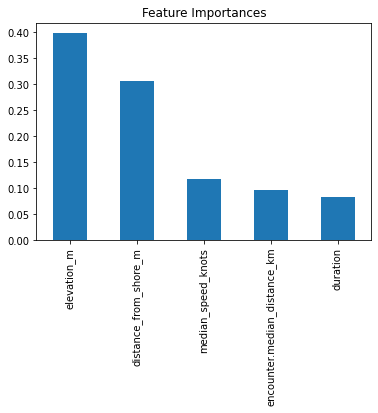

In [19]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importances')

In [20]:
df.corr()

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
median_speed_knots,1.000000,-0.474115,0.436371,0.402930,-0.186067,-0.160470,0.283018
elevation_m,-0.474115,1.000000,-0.717027,-0.671999,0.154465,0.199210,-0.686767
distance_from_shore_m,0.436371,-0.717027,1.000000,0.932287,-0.158022,-0.206235,0.489770
distance_from_port_m,0.402930,-0.671999,0.932287,1.000000,-0.163143,-0.190148,0.457999
encounter.median_distance_km,-0.186067,0.154465,-0.158022,-0.163143,1.000000,-0.044449,-0.000476
duration,-0.160470,0.199210,-0.206235,-0.190148,-0.044449,1.000000,-0.165146
is_authorized,0.283018,-0.686767,0.489770,0.457999,-0.000476,-0.165146,1.000000


<AxesSubplot:xlabel='distance_from_port_m', ylabel='elevation_m'>

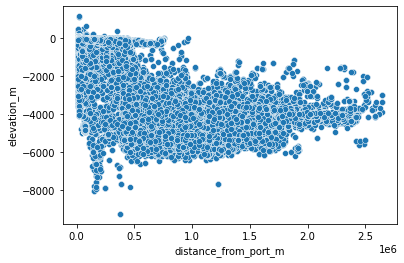

In [21]:
import seaborn as sns
import numpy as np
sns.scatterplot(x='distance_from_port_m', y='elevation_m' , data=df)

In [22]:
# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

In [23]:
preds = gnb.predict(X_test)
print(preds)

# Evaluate accuracy
print(accuracy_score(y_test, preds))

[1 0 1 ... 0 0 0]
0.77338717751894


In [24]:
len(preds)

29963

In [25]:
X_train.value_counts()

median_speed_knots  elevation_m  distance_from_shore_m  encounter.median_distance_km  duration 
 1.587232           -0.767938     1.756666              -0.170230                     -0.423770    4
 1.148012           -0.873248     2.575231              -0.139599                     -0.751257    4
 0.647336           -1.305069     0.633698              -0.124283                     -0.929886    3
 0.757593           -0.876614     2.795221              -0.461228                      0.320518    3
 1.222119           -1.233900     0.603001              -0.599069                     -0.929886    3
                                                                                                  ..
-0.516690            0.679477    -0.381835              -0.200861                      2.166353    1
                     0.686209     0.027448              -0.553122                      0.112118    1
                     0.687652    -0.284630              -0.399965                     -1.019200 

In [26]:
y_train.value_counts()

0    45311
1    13501
2    11099
Name: is_authorized, dtype: int64

In [27]:
y_test.value_counts()

0    19332
1     5716
2     4915
Name: is_authorized, dtype: int64

## Random Forest CLassifier

In [28]:
pd.Series(y_pred.tolist()).value_counts()

0    19338
1     6306
2     4319
dtype: int64

## Naive Bayes Classifier

In [29]:
pd.Series(preds.tolist()).value_counts()

0    19440
1     9443
2     1080
dtype: int64

In [30]:
df[df['is_authorized'] == 0]

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
0,0.028,-105,396000,417048.781,0.052,350.0,0
1,0.016,-111,394000,415769.344,0.047,1020.0,0
2,0.019,-101,394000,416120.438,0.037,350.0,0
3,0.041,-90,394000,415715.250,0.049,340.0,0
4,0.016,-90,394000,415715.250,0.064,400.0,0
...,...,...,...,...,...,...,...
355260,0.034,-36,15000,154081.469,0.038,130.0,0
355763,0.100,-27,17000,153872.844,0.383,280.0,0
356479,0.012,-17,6000,21471.938,0.024,150.0,0
356758,0.877,-346,352000,419316.625,0.027,990.0,0


In [31]:
df[df['is_authorized'] == 2][0:10]

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
5,1.649,-4063,320000,321562.000,0.025,430.0,2
6,0.306,-4928,45000,72848.672,0.059,840.0,2
7,1.304,-2667,224000,340354.656,0.028,200.0,2
8,1.451,-3414,227000,294973.125,0.021,220.0,2
9,0.985,-2405,283000,625707.688,0.020,140.0,2
10,0.431,-4695,56000,63495.594,0.036,970.0,2
11,1.972,-4349,195000,197768.578,0.018,360.0,2
12,0.634,-4041,256000,257935.422,0.033,1020.0,2
13,1.256,-2592,285000,632825.375,0.023,340.0,2
14,0.641,-4472,290000,420552.438,0.310,130.0,2


<AxesSubplot:xlabel='is_authorized', ylabel='elevation_m'>

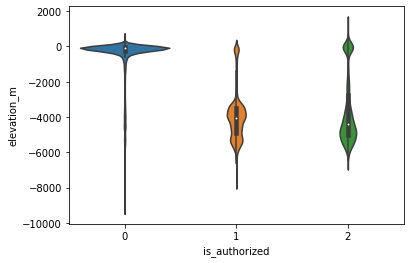

In [32]:
sns.violinplot(x='is_authorized', y='elevation_m', data=df)

<AxesSubplot:xlabel='is_authorized', ylabel='median_speed_knots'>

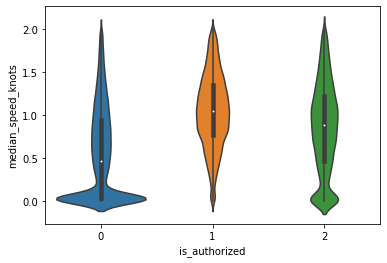

In [33]:
sns.violinplot(x='is_authorized', y='median_speed_knots', data=df)

<AxesSubplot:xlabel='is_authorized', ylabel='distance_from_port_m'>

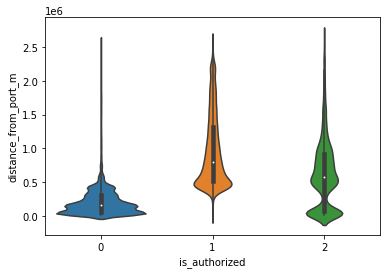

In [34]:
sns.violinplot(x='is_authorized', y='distance_from_port_m', data=df)

<AxesSubplot:xlabel='distance_from_port_m', ylabel='Count'>

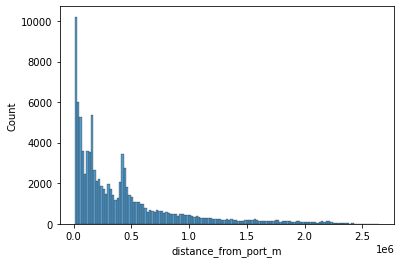

In [35]:
sns.histplot(x='distance_from_port_m', data=df)

<AxesSubplot:xlabel='median_speed_knots', ylabel='Count'>

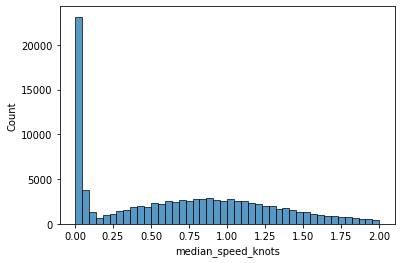

In [36]:
sns.histplot(x='median_speed_knots', data=df)

In [37]:
df.describe()

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
count,99874.000000,99874.000000,9.987400e+04,9.987400e+04,99874.000000,99874.000000,99874.000000
mean,0.694860,-1663.019565,3.142699e+05,4.306524e+05,0.058115,462.340649,0.513097
std,0.553252,2079.569164,3.909281e+05,4.779950e+05,0.065293,335.891460,0.755327
min,0.000000,-9243.000000,0.000000e+00,1.000041e+04,0.000000,0.000000,0.000000
25%,0.058000,-3849.000000,2.600000e+04,9.000167e+04,0.030000,200.000000,0.000000
50%,0.695000,-238.000000,1.230000e+05,2.640885e+05,0.041000,340.000000,0.000000
75%,1.114000,-55.000000,4.670000e+05,5.599009e+05,0.056000,650.000000,1.000000
max,2.000000,1155.000000,2.106000e+06,2.645444e+06,0.498000,1430.000000,2.000000


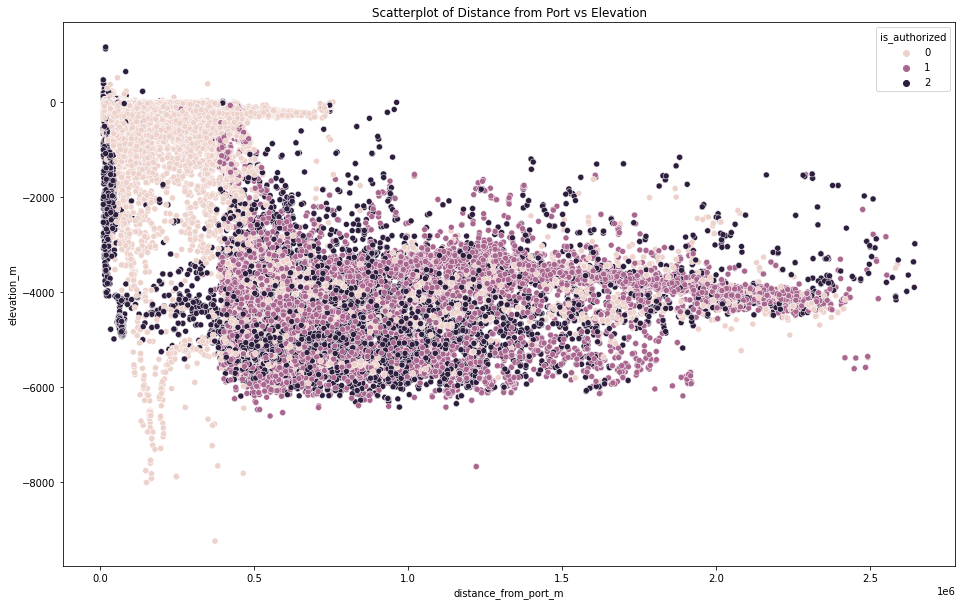

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(x='distance_from_port_m', y='elevation_m', hue='is_authorized', data=df).set(title='Scatterplot of Distance from Port vs Elevation')
plt.show()